<a href="https://colab.research.google.com/github/miguel-duque06/Analise_exploratoria-EDA/blob/main/Analise__exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise exploratória para uma empresa de chocolate:

![Chocolate](https://www.callebaut.com/sites/default/files/styles/callebaut_homepage_intro/public/2025-08/Callebaut%20Chocolate%20Belgium%201911.jpg.webp?h=7849835a&itok=qwNHIJNa)

In [ ]:
import pandas as pd

In [ ]:
url = '/content/Chocolate_Sales.csv'

In [ ]:
dados_nulos = pd.read_csv(url)

In [ ]:
dados_chocolate = dados_nulos.dropna()

#A empresa quer dar um prêmio para o maior vendedor deles
Objetivo: Identificar o vendedor com maior performance comercial através da análise do dataset Chocolate_Sales.csv contendo informações de Sales Person, Country, Product, Date, Amount e Boxes Shipped.





![Vendedor](https://lh3.googleusercontent.com/gg/AMW1TPq_Q4nW7-EkrogazReaaGWGotZBb7F8uA7nA69bat8M6_3RfyHt8_ejHMjjz-8oqGBd7PVLkDbnE1UFpFCq0aYojLTxH4NcdaPZxnypLnqCydbTUxTfC6XISf6XXSYvll6w85RycPu6NMj2gah6GmYUk8nz-Pr9LSh09-SabWoNsRq4oig=s1024-rj-mp2)

Limpando os dados da coluna "Amount" e tornando-os em float

In [ ]:
dados_chocolate['Amount'] = (
    dados_chocolate['Amount']
    .astype(str)
    .str.replace('$', '')
    .str.replace(',', '')
    .astype(float)
)

Calculo das vendas por vendedor

In [ ]:
faturamento_vendedor = dados_chocolate.groupby('Sales Person')['Amount'].sum().sort_values(ascending=False)

In [ ]:
faturamento_vendedor

,Amount
Sales Person,
Ches Bonnell,1022599.96
Oby Sorrel,1017204.12
Madelene Upcott,1010028.72
Kelci Walkden,1002929.10
Brien Boise,997326.48
Van Tuxwell,974425.09
Dennison Crosswaite,931849.57
Beverie Moffet,892421.37
Kaine Padly,849062.76


#Gráfico do faturamento por vendedor

<Axes: xlabel='Sales Person', ylabel='Amounts'>

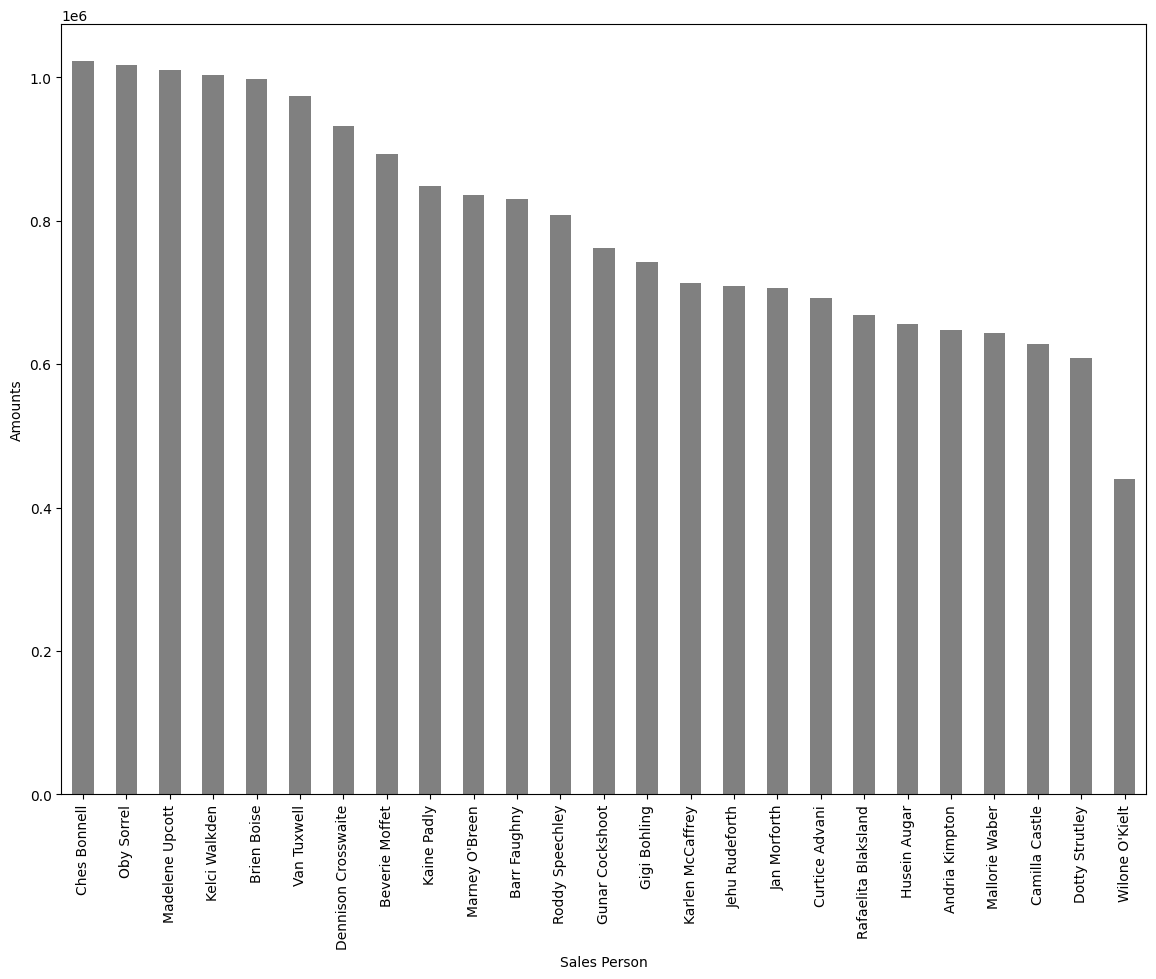

In [ ]:
faturamento_vendedor.plot(kind = 'bar', figsize= (14,10), color = 'gray', xlabel='Sales Person', ylabel='Amounts')

#A empresa está precisando deixar de vender um produto para diminuir os gastos
Objetivo: Identificar por meio de um gráfico qual produto está sendo menos vendido.

![Vendas caindo](https://img.freepik.com/fotos-premium/conceito-de-falencia-com-corrente-caindo-como-um-jogo-de-domino-e-diminuindo_207634-675.jpg?semt=ais_hybrid&w=740&q=80)

In [ ]:
frequencia_produtos = dados_chocolate['Product'].value_counts().sort_values()

In [ ]:
frequencia_produtos

,count
Product,
Choco Coated Almonds,117
Baker's Choco Chips,123
70% Dark Bites,126
Caramel Stuffed Bars,129
Manuka Honey Choco,135
Mint Chip Choco,135
Orange Choco,141
Raspberry Choco,144
Almond Choco,144


#Gráfico dos produtos vendidos

<Axes: xlabel='Count', ylabel='Product'>

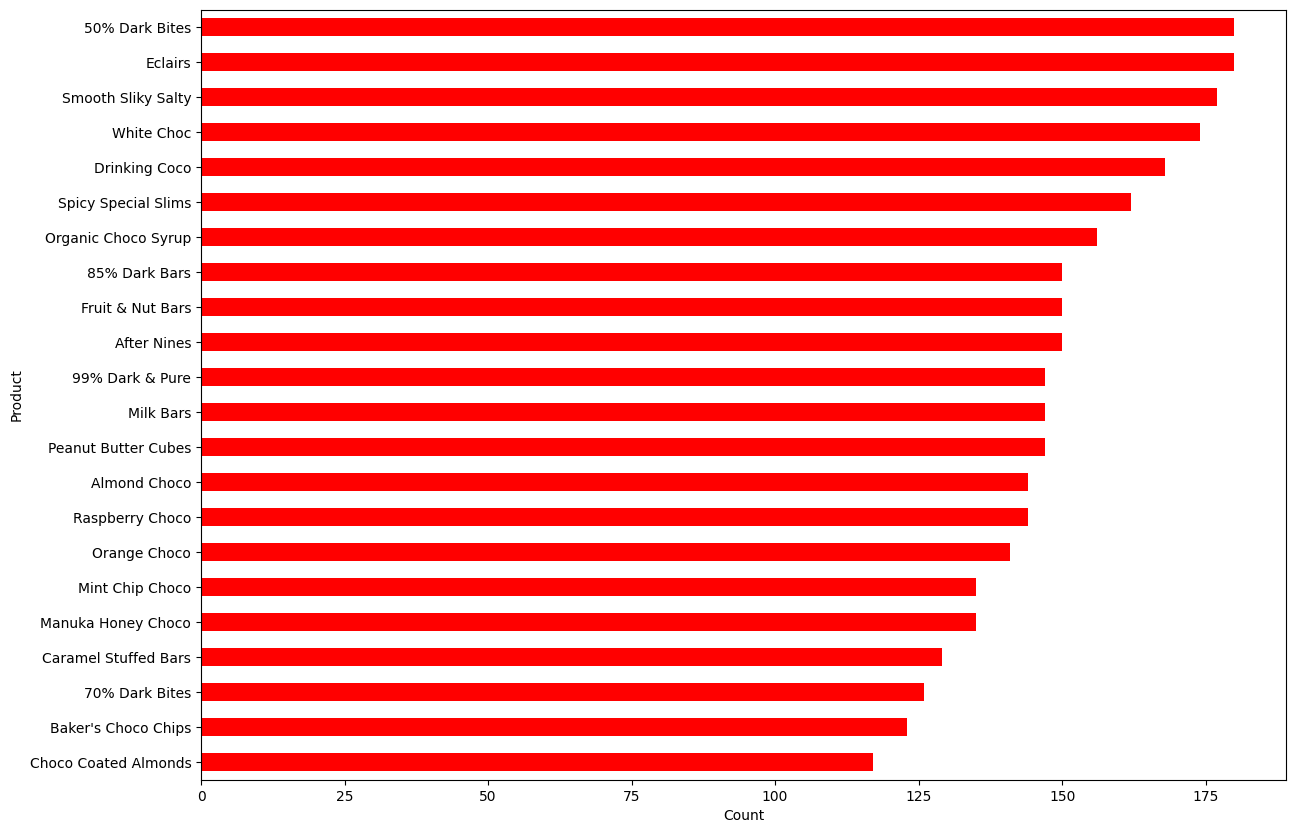

In [ ]:
frequencia_produtos.plot(kind='barh', figsize=(14,10), color='red', xlabel='Count', ylabel='Product')

![Vendas mundo](https://lh3.googleusercontent.com/gg/AMW1TPqQQWaYpbRDkPp2E66m_C_zw11k9sZeKWnHDXV5n13FD-ZL1vsyp0bPHSwas1U59nw2wx6UN8_cjbSr2uANsLYrzLhBCL27jmoG7itIKP7b7gt9iWXvN7qgRDjOgVBaJGblkkJ3EW686Wy_dwP7XFdOlpQSDbpKBSlH9LFxxsj09cFteay4=s1024-rj-mp2)

#Qual país recebe mais pedidos?

In [ ]:
faturamento_pais = dados_chocolate['Country'].value_counts().sort_values()

In [ ]:
faturamento_pais

,count
Country,
New Zealand,519
Canada,525
UK,534
USA,537
India,552
Australia,615


#Gráfico dos paises com mais pedidos

<Axes: ylabel='Country'>

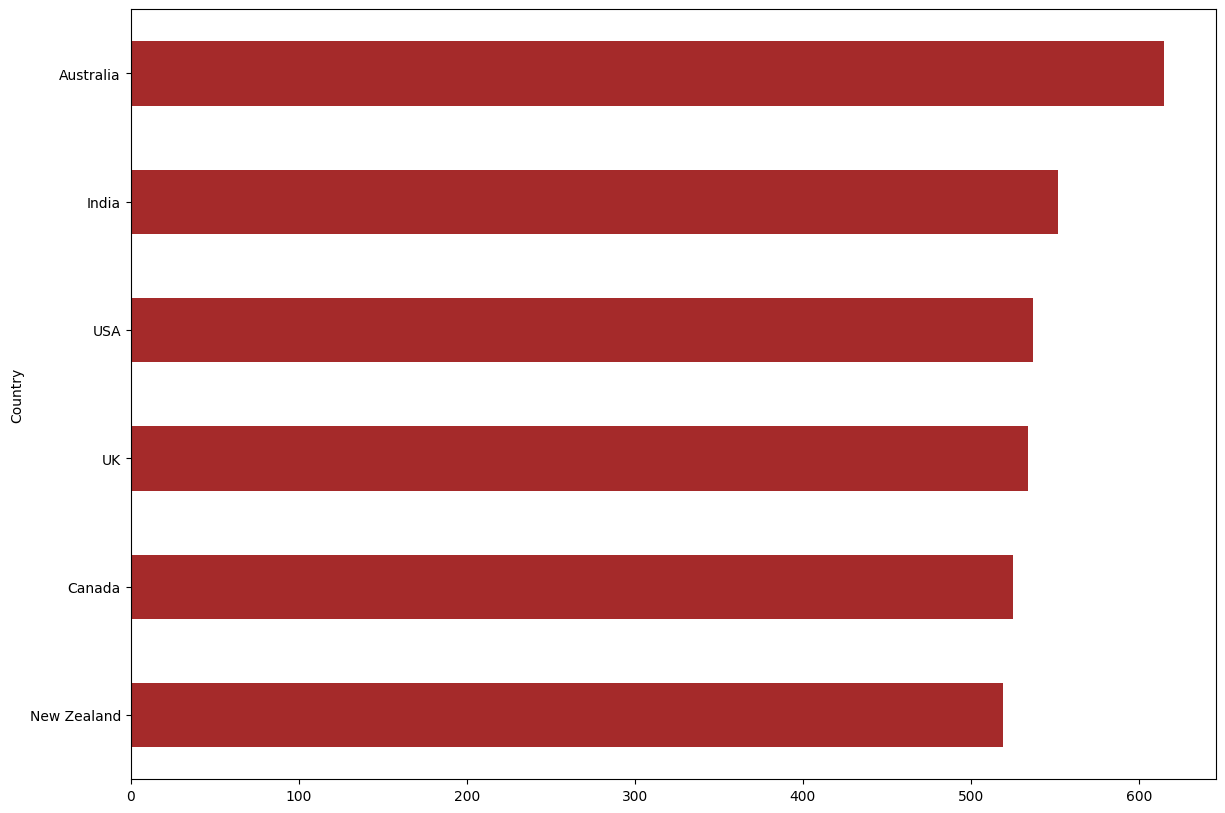

In [ ]:
faturamento_pais.plot(kind='barh', figsize=(14,10), color='brown')

#A empresa quer enteder qual mês eles devem aumentar a produção de chocolates
Objetivo: Identificar em qual mês a empresa vende mais.

![Mais vendas](https://abisa.com.br/site/wp-content/uploads/Grafico-de-colunas-aumento-vendas.jpg)

Convertendo Date para datetime

In [ ]:
dados_chocolate['Date'] = pd.to_datetime(dados_chocolate['Date'], format='%d/%m/%Y')

Extraindo MÊS

In [ ]:
dados_chocolate['Mes'] = dados_chocolate['Date'].dt.month

Calculando dados

In [ ]:
vendas_por_mes = dados_chocolate.groupby('Mes')['Amount'].sum()

In [ ]:
vendas_por_mes

,Amount
Mes,
1,2868712.59
2,2232096.90
3,2404769.29
4,2161927.22
5,2415750.57
6,2773931.94
7,2567532.29
8,2366851.06


#Gráfico dos meses com mais vendas

<Axes: xlabel='Mes'>

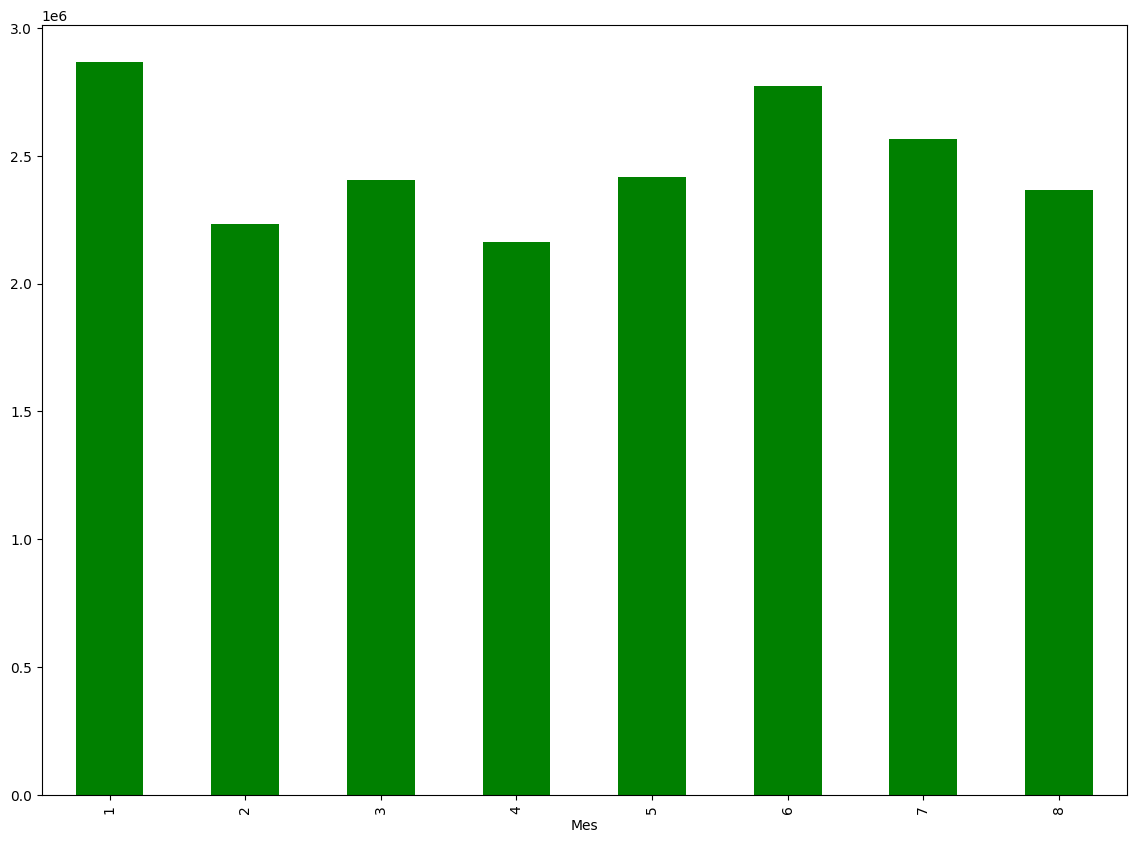

In [ ]:
vendas_por_mes.plot(kind='bar', figsize=(14,10), color='green')